# Quantum Helloworld: Creation of an EPR pair


The goal of this jupyter notebook is to make you create your first quantum program in pyAQASM.
This will lead us to see the main functionnalities to create a quantum program:

+ create an object program
+ allocate a register of qubits
+ apply gates
+ generate the circuit from the program
+ create a job
+ submit a job

We will do it step by step to create an EPR pair. The circuit looks like that:

<table>
    <tr><td>
        <img src="epr.png" width="33%"></td>
    </tr>
</table>


## First step: Create a program

To create a quantum circuit the first step on a QLM is to create a variable that will hold the program.
This first step can be done this way :

+ import the functions from qat.lang.AQASM
+ create a program variable

Complete the following cell to import the functions from qat.lang.AQASM:

In [14]:
from qat.lang.AQASM import *

Once this step is done we can create a program object.

To do so you need:
+ to define a name for the variable of your program
+ to call from the library AQASM the function Program

Complete the following cell with: 
+ a name for your program

In [15]:
prog = Program() 

We now have a variable that will be able to hold the program we want to implement. We will see in the next part how to allocate the qubits.

## Second step: Allocate the qubits

<table>
    <tr><td>
        <img src="epr.png" width="33%"></td>
    </tr>
</table>

For our example we need to allocate two qubits in our program.

We need to:
+ define the name for our register of qubits
+ call the function qalloc on our program
+ define the number of qubits we want

Complete the following cell to create two qubits:

In [16]:
qbits = prog.qalloc(2) 

## Third step: Applying gates

Now, we can have access to our qbits using the name of the register.

Registers behave like python list/arrays, for example if you named your register QUBIT_REGISTER:
+ QUBIT_REGISTER[0] is the first qubit.
+ QUBIT_REGISTER[1] is the second qubit.

To create our EPR pair, we simply need to apply the appropriate gates :
+ a Hadamard gate (H)
+ a controlled NOT gate (CNOT)

Let's apply the Hadamard gate on the first qubit.
To do so we need to:
+ specify on which program we wish to apply our gate
+ specify the gate we wish to apply
+ specify the name of the qubit register we wish to apply the gate
+ specify the index of the qubit inside the register

The Hadamard gate is of arity 1 since it affects one qubit. 

Complete the following cell :

In [17]:
prog.apply(H, qbits[0]) 

Once we have applied the Hadamard gate, we can apply the controlled NOT gate.

A CNOT gate affects two qubits so it is a gate of arity 2.

To do so we need to:
+ specify on which program we wish to apply our gate
+ specify the gate we wish to apply
+ specify the first qubit which is the controller
+ specify the second qubit which is affected by the controlled NOT

In [18]:
prog.apply(CNOT, qbits[0],qbits[1])

We have access to a variable containing our implementation of the EPR pair.

We now need to create the circuit associated to this program.

## Fourth step: Create and visualize the circuit

The QLM is based on an object called a circuit.

Once a program is created it is possible to generate the circuit from it.

A circuit can therefore be :
+ executed
+ optimized
+ used to create other circuits

To create your circuit you will need to:
+ define the name of your cicuit
+ call the function <i>to_circ</i> on your program

Please, complete the following cell:

In [19]:
circuit = prog.to_circ()

Now that we have a proper circuit, we can vizualize it using:
+ %qatdisplay CIRCUIT_NAME

Try this in the following cell:

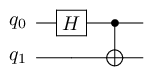

In [20]:
%qatdisplay circuit

The circuit vizualisation is a usefull tool to quickly verify if the implementation of a program went well.

## Fifth step: Execute the circuit

### Full distribution

The steps we have done before gave us a circuit.

We now need to create a job from this circuit using the function <i>to_job</i> on our circuit.

You can use the following cell to get more informations about the function <i>to_job</i>.


In [21]:
help(circuit.to_job)

Help on method to_job in module qat.core.wrappers.circuit:

to_job(job_type='SAMPLE', qubits=None, nbshots=0, aggregate_data=True, amp_threshold=9.094947017729282e-13, **kwargs) method of qat.core.wrappers.circuit.Circuit instance
    Generates a Job containing the circuit and some post
    processing information.
    
    Args:
        job_type (str): possible values are "SAMPLE" for computational basis sampling
            of some qubits, or "OBS" for observable evaluation
            (see :py:mod:`qat.core.Observable`
            for more information about this mode).
        qubits (optional, list<int>, list<QRegister>): the list of qubits to measure
            (in "SAMPLE" mode).
            If some quantum register is passed instead, all the qubits of the register will be
            measured. Moreover, if the register was "typed"
            (see :meth:`qat.lang.AQASM.Program.qalloc`
            for more information), the results will be cast into the register type.
           

To create a job we need to :
+ define the name for your job
+ call the function <i>to_job()</i> on a circuit

We will call <i>to_job</i> without any parameter for this first time.

In [22]:
job = circuit.to_job()

For this first time on a QLM we will focus on a perfect simulation based on linear algebra.

Be aware that there exist five different perfect simulators and it is possible to do noisy simulation on the QLM.

To make a simulation with our job on a QLM we need to submit it to a qpu.

To do so we first need to:
+ import the function LinAlg from qat.qpus
+ create a qpu by calling LinAlg()

In [25]:
import qat.qpus as qpu
linalgqpu = qpu.Linalg()

AttributeError: module 'qat.comm.shared.ttypes' has no attribute 'ApplicationResult'

We can now submit the job to our simulator.

To do so we need to use the function <i>submit</i> on our qpu and passing our job as a parameter:

In [ ]:
result = linalgqpu.submit(job)

We can now print the results for example like that:

In [ ]:
for sample in result:
    print("State %s amplitude %s" % (sample.state, sample.amplitude))

This is the first way to create a job: without any parameters. So this is the default case. This way the qpu returns the best it can do. For the simulator LinAlg we have access to all the non-zero states with the information about the amplitude.

### Strictly emulate

The second way is to strictly emulate a qpu. To do so you need to specify the option nbshots a strictly superior to 0. For example:

In [ ]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10)

The same way as previously can be used to submit the job to a simulator:

In [ ]:
# Submit to the QPU
result = linalgqpu.submit(job)

And now print the results:

In [ ]:
# And use it to draw 10 samples
for sample in result:
    print("We measured the state {} (its probability is {} and its amplitude {})".format(sample.state, sample.probability, sample.amplitude))

Firstly, as you can see the amplitude is at None since we strictly emulate the behavior of a QPU. And QPU will only end up with only a single measurement without any information on the amplitude.

Secondly, by default the results are aggregated. This means we launched 10 times (nbshots=10) the execution of our circuit and made an estimation of the probability for each state based on this sampling.

Note : you can execute the previous cell multiple times and you will randomly obtain a state.

It is possible to create a job without aggregating (aggregate_data=False) the results:

In [ ]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10, aggregate_data=False)

In [ ]:
# Submit to the QPU
result = linalgqpu.submit(job)

In [ ]:
# And use it to draw 10 samples
for sample in result:
    print("We measured the state {}".format(sample.state))

As you can see the only information we are getting are the states of each execution.

We have seen how to :
+ create a program
+ allocate some qubits
+ apply gates
+ generate a circuit
+ create a job (full distribution, strictly emulate, aggregate data)
+ submit a job

This ends the jupyter notebook of the helloworld.